## General python Imports

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder


## Importing libraries for Neural Network

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.models import load_model
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

## Start of all the functions used 

In [3]:
# Function to check how many categories each column has with the OBJECT datatype
def checkUnique(dfCheck):
    #looping through the columns of each dataset
    for column in dfCheck.columns:
        #Checking if the column is object
        if (dfCheck[column].dtypes == 'object'):
            #saving the count of each unique column
            categoryCount = len(dfCheck[column].unique())
            #checking the distribution for the given column
            distNumber = dfCheck[column].value_counts().sort_values(ascending=False)
            print(f'Column: {column} has {categoryCount} unique categories')
            print(f'Distribution for {column}')
            print(distNumber)
            print()
            

In [4]:
# Function used to created new column names for the new categories
def createLabel(stringName, dfCheck):
    #creating the new variable name for the column Name
    newCategory= stringName
    newCat = newCategory+'_'
    #sorting the categories of the df
    dfSorted = sorted(dfCheck[stringName].unique())
    #creating a unique category name for the column Name
    categoryName=[newCat + x for x in dfSorted]
    return categoryName

In [5]:
# Function used to create a new df with the enconded df
def createNewCategorical(dfEnconded, colunmNames):
    #using sklearn OneHOTEncoder to trasform to a numeric array
    hotEncoder = OneHotEncoder(categories='auto')
    newDfEnconded =  hotEncoder.fit_transform(dfEnconded)
    #creating the new dataset with the new categorical columns
    finalDF = pd.DataFrame(newDfEnconded.toarray(),columns=colunmNames)
    return finalDF

In [6]:
#function to check which new catergory is missing on the test dataset
def checkMissingColumn(dfCheckTrain, dfCheckTest, stringCheck, dfName):
    #adding the train and test data set to a list to check for the missing columns
    trainList = dfCheckTrain[stringCheck].tolist()
    testList = dfCheckTest[stringCheck].tolist()
    #finding the values missing on the test dataset
    missingList = list(set(trainList) - set(testList))
    checkCategory = stringCheck+'_'
    #finding the missing columns
    missingColumns=[checkCategory + x for x in missingList]
    print(f'Columns missing on {dfName} data sets are:')
    print(missingColumns)
    print()
    return missingColumns

In [7]:
#function to add the missing column to a df
def addMissingColumn(dfAdd, columnList):
    #loop to add the missing column and put 0 on them
    newDfTest = dfAdd
    for columnName in columnList:
        newDfTest[columnName] = 0

    return newDfTest

In [8]:
#Function to join the categorical and general df for train and test dataset.
#It will also replace the final label column with a numerical value
def getFinalDF(dfCheckOriginal, dfCheckCategorical):
    #joining the two datasets and droping the old object columns
    dfCheckOriginal = dfCheckOriginal.reset_index(drop=True)
    FinalDF=dfCheckOriginal.join(dfCheckCategorical)
    FinalDF.drop('flag', axis=1, inplace=True)
    FinalDF.drop('protocol_type', axis=1, inplace=True)
    FinalDF.drop('service', axis=1, inplace=True)
    print(FinalDF.shape)
    return FinalDF

In [9]:
#Function to create our Neural Network Model with 3 Hidden layers
def createModel():
    model = Sequential()
    #118 is output dimension
    model.add(Dense(118,input_dim =118,activation = 'relu',kernel_initializer='random_uniform'))
    #in next layer we do not specify the input_dim as the model is sequential so output of previous layer is input to next layer
    model.add(Dense(1,activation='sigmoid',kernel_initializer='random_uniform'))
    #23 type of clases: 'normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.','smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       #'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       #'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       #'spy.', 'rootkit.'
    model.add(Dense(23,activation='softmax'))
    #monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3, verbose=1, mode='auto')
    #loss is categorical_crossentropy which specifies that we have multiple classes
    model.compile(loss ='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    return model

In [10]:
# Function to create our second Neural Network with 5 Hidden layers
def createModel2():
    model = Sequential()
    #118 is output dimension
    model.add(Dense(118,input_dim =118,activation = 'relu', kernel_initializer='random_uniform'))
    #second layer we do not specify the input_dim as the model is sequential so output of previous layer is input to next layer
    model.add(Dense(60,activation = 'relu', kernel_initializer='random_uniform'))
    model.add(Dense(30,activation = 'relu', kernel_initializer='random_uniform'))
    #adding another hidden layer
    model.add(Dense(1,activation='sigmoid',kernel_initializer='random_uniform'))
    #23 type of clases: 'normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.','smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       #'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       #'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       #'spy.', 'rootkit.'
    model.add(Dense(23,activation='softmax'))
    #loss is categorical_crossentropy which specifies that we have multiple classes
    model.compile(loss ='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3, verbose=1, mode='auto')
    return model

In [11]:
#Function to create a scaled dataset
def scaleData(dfCheck):
    # setting the scale and returning the scaled df
    sc = preprocessing.StandardScaler().fit(dfCheck)
    dfScaled = sc.transform(dfCheck) 
    return dfScaled

In [12]:
#function used to create quick graphs for a given column Name
def plotGraph(columnName):
    plt.title(columnName)
    df[columnName].value_counts().plot(kind="bar")

## Names of the headers

In [13]:
labelNames = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

## Reading the csv dataset

In [14]:
df = pd.read_csv('kddcup.data_10_percent_corrected',header=None, names = labelNames)

In [15]:
df.shape

(494021, 42)

## Ploting a heat map to check for NULL's

<AxesSubplot:>

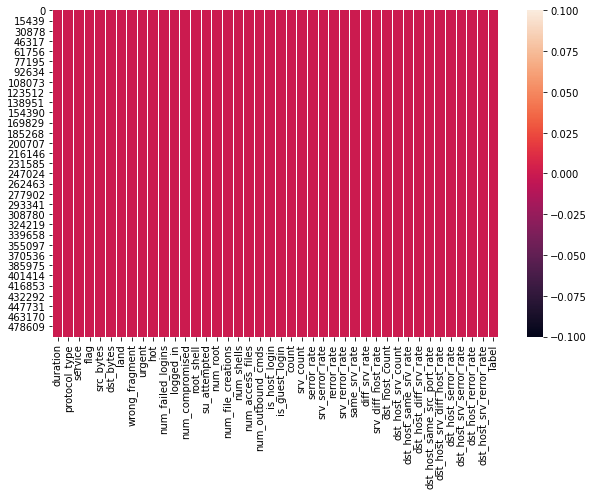

In [16]:
plt.subplots(figsize=(10,6))
sns.heatmap(df.isnull())

## Log-scale distribution of the dataset

<Figure size 432x288 with 0 Axes>

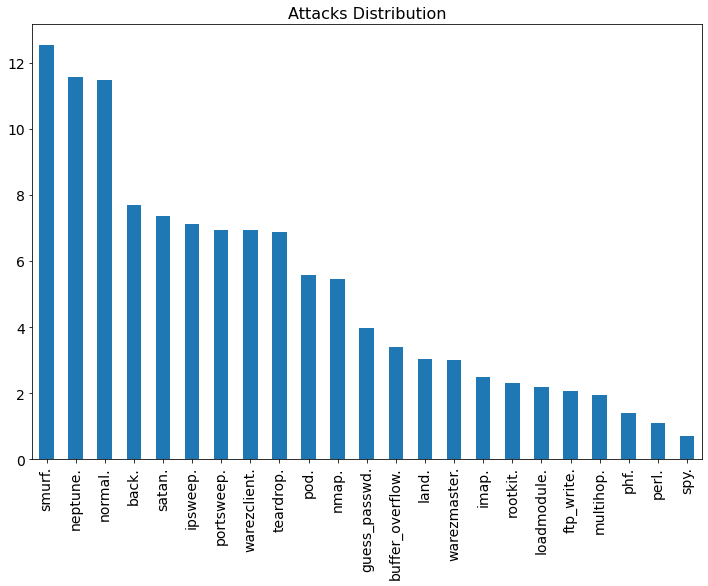

In [17]:
#log-scaled distribution
plt.clf()
plt.figure(figsize=(12,8))
params = {'axes.titlesize':'16','xtick.labelsize':'14','ytick.labelsize':'14'}
matplotlib.rcParams.update(params)
plt.title('Attacks Distribution')
df['label'].value_counts().apply(np.log).plot(kind='bar')
plt.show()

## Correlation matrix of the dataset

Text(0.5, 1.0, 'Correlation Matrix')

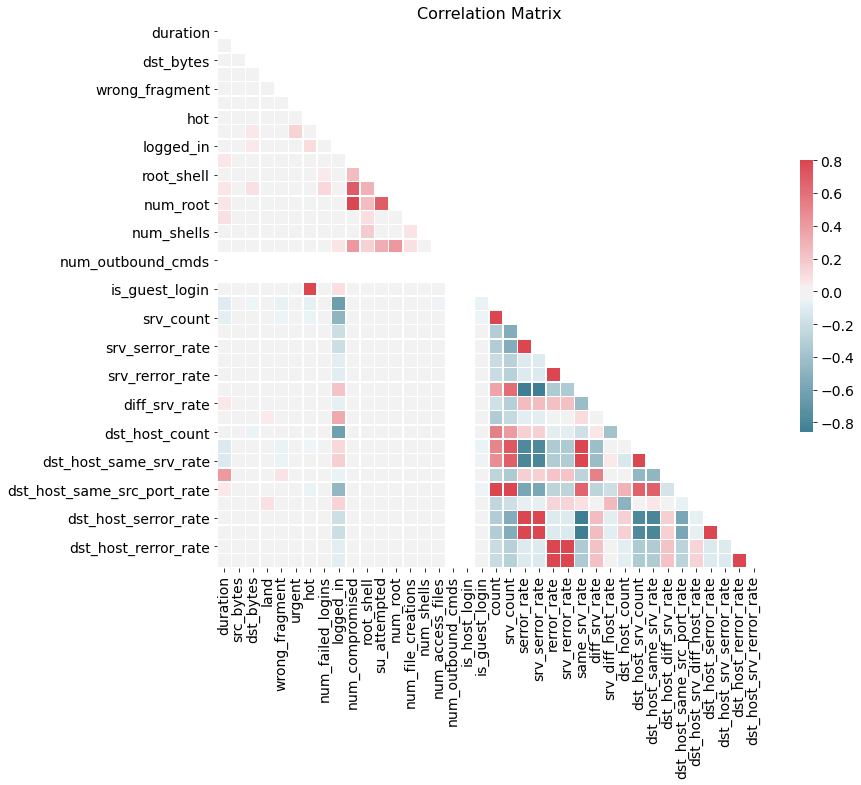

In [18]:
#putting in a different variable the correlation matrix
corr = df.corr()

#plotting the correlation matrix
dfMask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(14,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#using sns heatmap for the plotting
sns.heatmap(corr,mask=dfMask, cmap=cmap, vmax=.8, center=0,square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.title('Correlation Matrix', fontsize = 16)

## Splitting the data for Train and Test

In [19]:
dfTrain, dfTest = train_test_split(df, test_size=0.2)

In [20]:
#printing the shape of all Datasets
print(f'Original Dataset: {df.shape} ,Train Dataset: {dfTrain.shape}, Test Dataset:{dfTest.shape}')

Original Dataset: (494021, 42) ,Train Dataset: (395216, 42), Test Dataset:(98805, 42)


## Checking the distribution of the Train and Test Datasets

In [21]:
#creating a distribution based on the label name
distTrain = dfTrain['label'].value_counts()
distTest = dfTest['label'].value_counts()
print(f'Distribution for Training set: {distTrain}')

Distribution for Training set: smurf.              224441
neptune.             85798
normal.              77985
back.                 1758
satan.                1273
ipsweep.               981
portsweep.             855
warezclient.           812
teardrop.              774
pod.                   215
nmap.                  182
guess_passwd.           41
buffer_overflow.        25
warezmaster.            16
land.                   16
rootkit.                10
ftp_write.               8
imap.                    7
multihop.                6
loadmodule.              6
phf.                     4
spy.                     2
perl.                    1
Name: label, dtype: int64


In [22]:
# Training dataset distribution
print(f'Distribution for Training set: {distTest}')

Distribution for Training set: smurf.              56349
neptune.            21403
normal.             19293
back.                 445
satan.                316
ipsweep.              266
warezclient.          208
teardrop.             205
portsweep.            185
pod.                   49
nmap.                  49
guess_passwd.          12
imap.                   5
buffer_overflow.        5
land.                   5
warezmaster.            4
loadmodule.             3
perl.                   2
multihop.               1
Name: label, dtype: int64


## Checking the datatypes

In [23]:
print(f'Train Datatypes:{dfTrain.dtypes}')

Train Datatypes:duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serro

## Checking how many unique Categories each column has and corresponding distribution

In [24]:
#checking how many unique categories as well as the distribution on the Train dataset
checkUnique(dfTrain)

Column: protocol_type has 3 unique categories
Distribution for protocol_type
icmp    226662
tcp     152215
udp      16339
Name: protocol_type, dtype: int64

Column: service has 65 unique categories
Distribution for service
ecr_i      224925
private     88743
http        51536
smtp         7787
other        5848
            ...  
urh_i          13
X11             7
tim_i           6
red_i           1
pm_dump         1
Name: service, Length: 65, dtype: int64

Column: flag has 11 unique categories
Distribution for flag
SF        302666
S0         69632
REJ        21551
RSTR         735
RSTO         465
SH            85
S1            42
S2            16
S3             9
RSTOS0         8
OTH            7
Name: flag, dtype: int64

Column: label has 23 unique categories
Distribution for label
smurf.              224441
neptune.             85798
normal.              77985
back.                 1758
satan.                1273
ipsweep.               981
portsweep.             855
warezclient.  

In [25]:
#checking how many unique categories as well as the distribution on the Test dataset
checkUnique(dfTest)

Column: protocol_type has 3 unique categories
Distribution for protocol_type
icmp    56940
tcp     37850
udp      4015
Name: protocol_type, dtype: int64

Column: service has 64 unique categories
Distribution for service
ecr_i      56475
private    22150
http       12757
smtp        1936
other       1389
           ...  
IRC           10
X11            4
tim_i          1
tftp_u         1
urh_i          1
Name: service, Length: 64, dtype: int64

Column: flag has 11 unique categories
Distribution for flag
SF        75774
S0        17375
REJ        5324
RSTR        168
RSTO        114
SH           22
S1           15
S2            8
RSTOS0        3
OTH           1
S3            1
Name: flag, dtype: int64

Column: label has 19 unique categories
Distribution for label
smurf.              56349
neptune.            21403
normal.             19293
back.                 445
satan.                316
ipsweep.              266
warezclient.          208
teardrop.             205
portsweep.          

## Two options: (1) Add each category to the dataset. (2) Remove these object columns 

## Option 1
* It will help the neural network


In [26]:
#creating the 3 new columns of services, protocol_type, and flag
columnNames = ['service', 'flag', 'protocol_type']

#create a new df for those columns
dfTrain_cat = dfTrain[columnNames]
dfTest_cat = dfTest[columnNames]

In [27]:
dfTrain_cat.sample(10)

,service,flag,protocol_type
290647,ecr_i,SF,icmp
353373,private,S0,tcp
354226,private,S0,tcp
420274,ecr_i,SF,icmp
417037,ecr_i,SF,icmp
347988,other,SF,udp
8208,ecr_i,SF,icmp
21367,http,SF,tcp
41128,ftp_data,SF,tcp
44362,ecr_i,SF,icmp


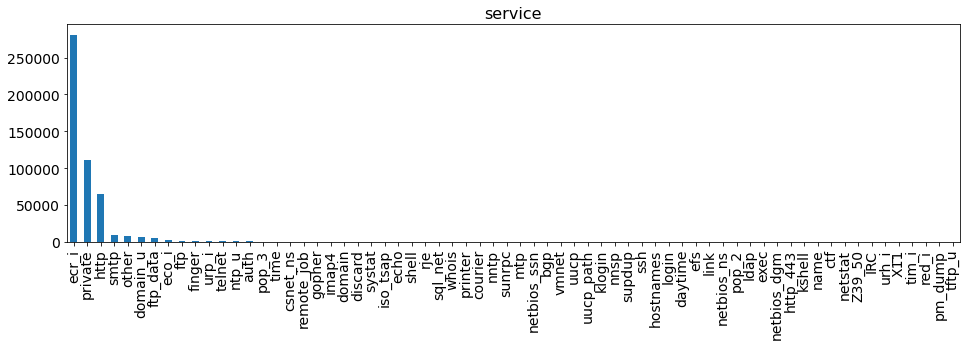

In [28]:
plt.figure(figsize=(16,4))
plotGraph('service')

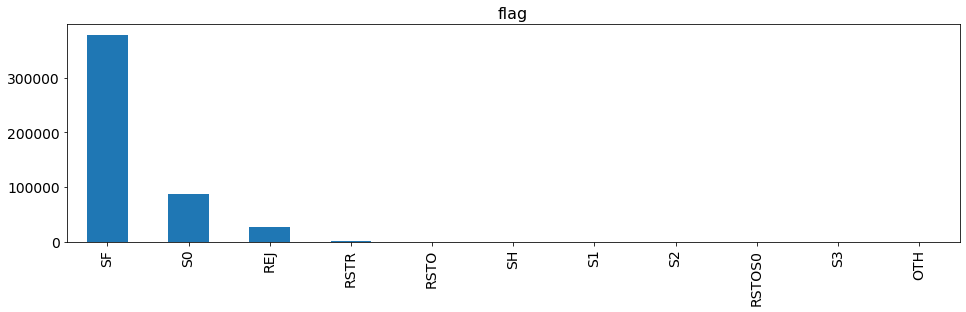

In [29]:
plt.figure(figsize=(16,4))
plotGraph('flag')

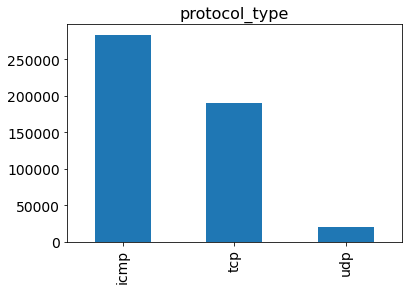

In [30]:
plotGraph('protocol_type')

In [31]:
#creating the new column names for the new categories on the Train dataset
ServiceNamesTrain = createLabel('service',dfTrain)
FlagNamesTrain = createLabel('flag',dfTrain)
protocolNamesTrain = createLabel('protocol_type',dfTrain)
#adding all columns name to a single set
allColumnsTrain = ServiceNamesTrain + FlagNamesTrain + protocolNamesTrain

In [32]:
allColumnsTrain

['service_IRC',
 'service_X11',
 'service_Z39_50',
 'service_auth',
 'service_bgp',
 'service_courier',
 'service_csnet_ns',
 'service_ctf',
 'service_daytime',
 'service_discard',
 'service_domain',
 'service_domain_u',
 'service_echo',
 'service_eco_i',
 'service_ecr_i',
 'service_efs',
 'service_exec',
 'service_finger',
 'service_ftp',
 'service_ftp_data',
 'service_gopher',
 'service_hostnames',
 'service_http',
 'service_http_443',
 'service_imap4',
 'service_iso_tsap',
 'service_klogin',
 'service_kshell',
 'service_ldap',
 'service_link',
 'service_login',
 'service_mtp',
 'service_name',
 'service_netbios_dgm',
 'service_netbios_ns',
 'service_netbios_ssn',
 'service_netstat',
 'service_nnsp',
 'service_nntp',
 'service_ntp_u',
 'service_other',
 'service_pm_dump',
 'service_pop_2',
 'service_pop_3',
 'service_printer',
 'service_private',
 'service_red_i',
 'service_remote_job',
 'service_rje',
 'service_shell',
 'service_smtp',
 'service_sql_net',
 'service_ssh',
 'service_s

In [33]:
#creating the new column names for the new categories on the Test dataset
ServiceNamesTest = createLabel('service',dfTest)
FlagNamesTest = createLabel('flag',dfTest)
protocolNamesTest = createLabel('protocol_type',dfTest)
#adding all columns name to a single set
allColumnsTest = ServiceNamesTest + FlagNamesTest + protocolNamesTest

In [34]:
#creating a label encoder for the new categories
dfTrainCategorical=dfTrain_cat.apply(LabelEncoder().fit_transform)
dfTestCategorical=dfTest_cat.apply(LabelEncoder().fit_transform)

In [35]:
#before label encoding
dfTrain_cat.head()

,service,flag,protocol_type
333799,ecr_i,SF,icmp
317617,ecr_i,SF,icmp
393048,private,S0,tcp
210385,ecr_i,SF,icmp
37735,http,SF,tcp


In [36]:
#after label encoding
dfTrainCategorical.head()

,service,flag,protocol_type
333799,14,9,0
317617,14,9,0
393048,45,5,1
210385,14,9,0
37735,22,9,1


In [37]:
#creating the new df with the new categories added to the train dataset
dfTrainCategoricalFinal = createNewCategorical(dfTrainCategorical, allColumnsTrain)

In [38]:
#creating the new df with the new categories added to the test dataset
dfTestCategoricalFinal = createNewCategorical(dfTestCategorical, allColumnsTest)

In [39]:
dfTrainCategoricalFinal.head()

,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,...,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [40]:
dfTestCategoricalFinal.head()

,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,...,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
#checking which columns are missing on the test dataset
columnS= checkMissingColumn(dfTrain, dfTest,'service', 'test')
columnF= checkMissingColumn(dfTrain, dfTest,'flag','test')
columnP= checkMissingColumn(dfTrain, dfTest,'protocol_type', 'test')

Columns missing on test data sets are:
['service_pm_dump', 'service_red_i']

Columns missing on test data sets are:
[]

Columns missing on test data sets are:
[]



In [42]:
#checking which columns are missing on the train dataset
columnS2= checkMissingColumn(dfTest,dfTrain,'service', 'train')
columnF2= checkMissingColumn(dfTest,dfTrain, 'flag', 'train')
columnP2= checkMissingColumn(dfTest,dfTrain,'protocol_type', 'train')

Columns missing on train data sets are:
['service_tftp_u']

Columns missing on train data sets are:
[]

Columns missing on train data sets are:
[]



In [43]:
#adding the missing columns on the df categorical
dfTrainCatFinal = addMissingColumn(dfTrainCategoricalFinal, columnS2)
dfTestCatFinal = addMissingColumn(dfTestCategoricalFinal, columnS)
dfTestCatFinal = addMissingColumn(dfTestCategoricalFinal, columnF)

In [44]:
#now we get the same column shape for both train and test dataset 
print(dfTrainCatFinal.shape)    
print(dfTestCatFinal.shape)

(395216, 80)
(98805, 80)


In [45]:
dfTrainCatFinal.head(5)

,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,...,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_tftp_u
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0


In [46]:
#joining the train and test dataset with the corresponding categorical
dfTrainFinal = getFinalDF(dfTrain, dfTrainCatFinal)
dfTestFinal = getFinalDF(dfTest, dfTestCatFinal)

(395216, 119)
(98805, 119)


In [47]:
#printing the shape of all Datasets
print(f'Original Dataset: {df.shape} ,Train Dataset: {dfTrain.shape}, Test Dataset:{dfTest.shape}')

Original Dataset: (494021, 42) ,Train Dataset: (395216, 42), Test Dataset:(98805, 42)


In [48]:
#printing the shape of all Datasets after adding the new categories
print(f'Original Dataset: {df.shape} ,Train Dataset Encoded: {dfTrainFinal.shape}, Test Dataset Enconded:{dfTestFinal.shape}')

Original Dataset: (494021, 42) ,Train Dataset Encoded: (395216, 119), Test Dataset Enconded:(98805, 119)


In [49]:
dfTrainFinal.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_tftp_u
0,0,1032,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
1,0,1032,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
2,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,0,1032,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
4,0,224,6482,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0


In [50]:
#splitting the data into X and Y for the train dataset
X_Train = dfTrainFinal.drop('label',1)
Y_Train = dfTrainFinal.label

In [51]:
#splitting the data into X and Y for the testing dataset
X_Test = dfTestFinal.drop('label',1)
Y_Test = dfTestFinal.label

In [52]:
print(X_Train.shape, X_Test.shape)
print(Y_Train.shape, Y_Test.shape)

(395216, 118) (98805, 118)
(395216,) (98805,)


### Very important to scale the data

In [53]:
#scaling the data
X_TrainedScaled=scaleData(X_Train)
X_TestScaled=scaleData(X_Test) 


### Creating the first Model with 3 hidden layers

In [54]:
#variables for both models epoches and batchsize
EPOCHES = 25
BS = 20

In [55]:
model = KerasClassifier(build_fn=createModel,epochs=EPOCHES,batch_size=BS)

In [56]:
modelHistory= model.fit(X_TrainedScaled, Y_Train.values.ravel(), 
                        validation_data=(X_TestScaled, Y_Test.values.ravel()),verbose=1, validation_split=0.1)

Epoch 1/25
17785/17785 [==============================] - 10s 581us/step - loss: 0.5869 - accuracy: 0.7808 - val_loss: 0.3783 - val_accuracy: 0.7823
Epoch 2/25
17785/17785 [==============================] - 10s 583us/step - loss: 0.2314 - accuracy: 0.9362 - val_loss: 0.1379 - val_accuracy: 0.9785
Epoch 3/25
17785/17785 [==============================] - 10s 585us/step - loss: 0.1284 - accuracy: 0.9797 - val_loss: 0.1153 - val_accuracy: 0.9804
Epoch 4/25
17785/17785 [==============================] - 10s 575us/step - loss: 0.1083 - accuracy: 0.9811 - val_loss: 0.1109 - val_accuracy: 0.9803
Epoch 5/25
17785/17785 [==============================] - 10s 578us/step - loss: 0.1041 - accuracy: 0.9812 - val_loss: 0.1054 - val_accuracy: 0.9804
Epoch 6/25
17785/17785 [==============================] - 10s 578us/step - loss: 0.0947 - accuracy: 0.9811 - val_loss: 0.0909 - val_accuracy: 0.9803
Epoch 7/25
17785/17785 [==============================] - 10s 576us/step - loss: 0.0809 - accuracy: 0.9811

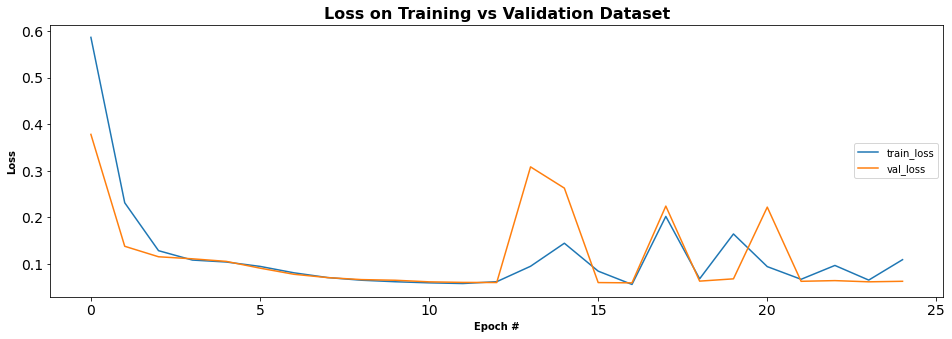

In [57]:
# plot the training/validation loss
fig= plt.figure(figsize = [16,5])
plt.plot(np.arange(0, EPOCHES), modelHistory.history["loss"], label="train_loss")
plt.plot(np.arange(0, EPOCHES), modelHistory.history["val_loss"], label="val_loss")
plt.title("Loss on Training vs Validation Dataset", weight="bold")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend(loc="right");
#plt.xlim(0,20)
#plt.ylim(0.00001,0.010)
plt.show()

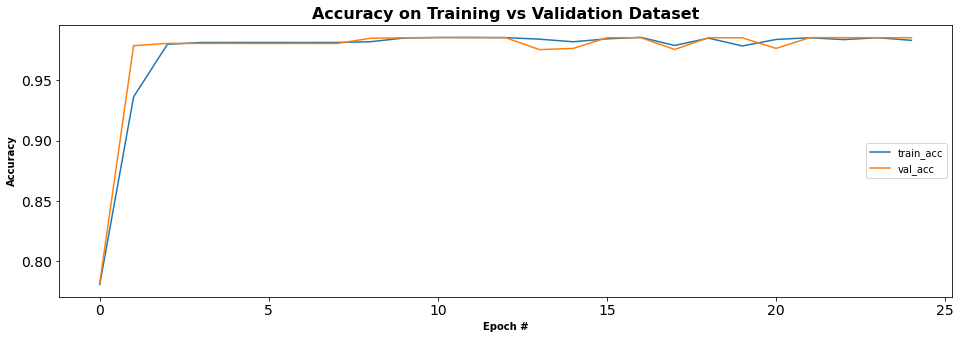

In [58]:
# plot the training/validation accuracy
fig = plt.figure(figsize = [16,5])
plt.plot(np.arange(0, EPOCHES), modelHistory.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, EPOCHES), modelHistory.history["val_accuracy"], label="val_acc")
plt.title("Accuracy on Training vs Validation Dataset", weight="bold")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend(loc="right");
#plt.xlim(0,20)
#plt.ylim(0.99900,1)
plt.show()

### Creating the second Model with 5 Hidden Layers

In [59]:
model2 = KerasClassifier(build_fn=createModel2,epochs=EPOCHES,batch_size=BS)

In [60]:
modelHistory2= model2.fit(X_TrainedScaled, Y_Train.values.ravel(), 
                          validation_data=(X_TestScaled, Y_Test.values.ravel()),verbose=1, validation_split=0.1)

Epoch 1/25
17785/17785 [==============================] - 12s 677us/step - loss: 0.6767 - accuracy: 0.7286 - val_loss: 0.2758 - val_accuracy: 0.9809
Epoch 2/25
17785/17785 [==============================] - 12s 654us/step - loss: 0.1467 - accuracy: 0.9821 - val_loss: 0.1063 - val_accuracy: 0.9814
Epoch 3/25
17785/17785 [==============================] - 12s 653us/step - loss: 0.0873 - accuracy: 0.9822 - val_loss: 0.0768 - val_accuracy: 0.9814
Epoch 4/25
17785/17785 [==============================] - 12s 648us/step - loss: 0.0647 - accuracy: 0.9823 - val_loss: 0.0612 - val_accuracy: 0.9812
Epoch 5/25
17785/17785 [==============================] - 12s 652us/step - loss: 0.0526 - accuracy: 0.9842 - val_loss: 0.0512 - val_accuracy: 0.9862
Epoch 6/25
17785/17785 [==============================] - 12s 661us/step - loss: 0.0468 - accuracy: 0.9865 - val_loss: 0.0484 - val_accuracy: 0.9860
Epoch 7/25
17785/17785 [==============================] - 12s 651us/step - loss: 0.0444 - accuracy: 0.9864

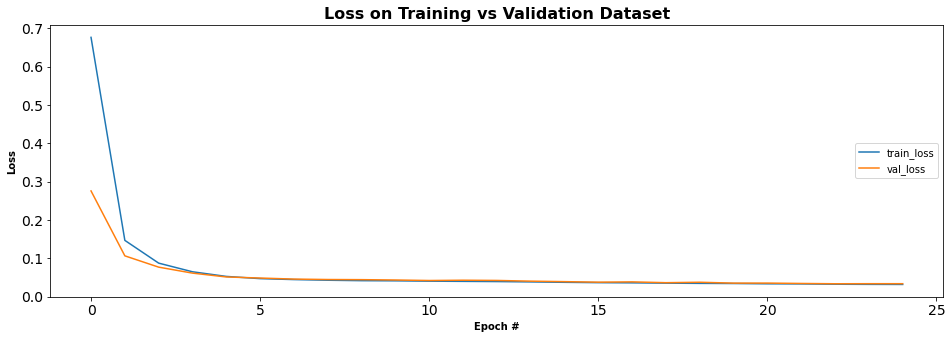

In [61]:
# plot the training/validation loss
fig= plt.figure(figsize = [16,5])
plt.plot(np.arange(0, EPOCHES), modelHistory2.history["loss"], label="train_loss")
plt.plot(np.arange(0, EPOCHES), modelHistory2.history["val_loss"], label="val_loss")
plt.title("Loss on Training vs Validation Dataset", weight="bold")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend(loc="right");
#plt.xlim(0,20)
#plt.ylim(0.00001,0.010)
plt.show()

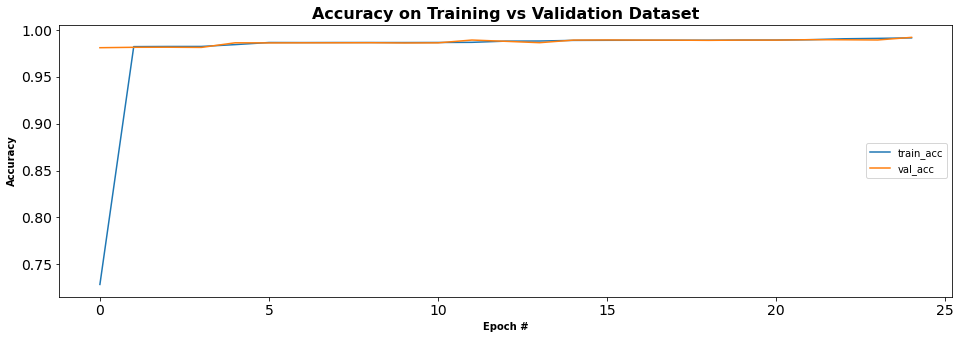

In [62]:
# plot the training/validation accuracy
fig = plt.figure(figsize = [16,5])
plt.plot(np.arange(0, EPOCHES), modelHistory2.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, EPOCHES), modelHistory2.history["val_accuracy"], label="val_acc")
plt.title("Accuracy on Training vs Validation Dataset", weight="bold")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend(loc="right");
#plt.xlim(0,20)
#plt.ylim(0.99900,1)
plt.show()